In [1]:
import os
import numpy as np
import glob
import json
import pandas as pd

In [2]:
PATH = '/home/anneke/Documents/models/weights'

In [3]:
w_dir = os.listdir(PATH)

In [4]:
from collections import defaultdict

data = defaultdict(list)

In [5]:
for w in w_dir:
    conf = glob.glob1(os.path.join(PATH, w), "CONF*")
    
    if conf:
        with open(os.path.join(PATH, '{}/CONFIG'.format(w))) as j:
            config = json.load(j)
            
            data['dataset'].append(config['args']['dataset'])
            data['train_mode'].append(config['args']['train_mode'])
            data['word_len'].append(config['args']['word_len'])
            data['epochs'].append(config['args']['epochs'])
            data['batch_size'].append(config['args']['batch_size'])
            data['start_time'].append(config['start_time'])
            data['end_time'].append(config['end_time'])
            data['total_keyword'].append(config['data_summary']['keyword']['total'])
            data['x_train'].append(config['data_summary']['data']['train'])
            data['x_test'].append(config['data_summary']['data']['test'])
            data['loss'].append(config['report']['loss'])
            data['accuracy'].append(config['report']['acc'])
            data['total_accept'].append(config['report']['total_accept'])
            data['total_reject'].append(config['report']['total_reject'])
            data['rejection_rate'].append(config['report']['rejection_rate'])

In [6]:
[len(d) for d in data.values()]

[57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57]

In [7]:
pdf = pd.DataFrame(data)

In [8]:
# df.to_csv('./result.csv')

In [9]:
df = pdf[pdf['epochs'] == 1]

In [10]:
adf = pdf[pdf['epochs'] == 1000]

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

## 1 epoch

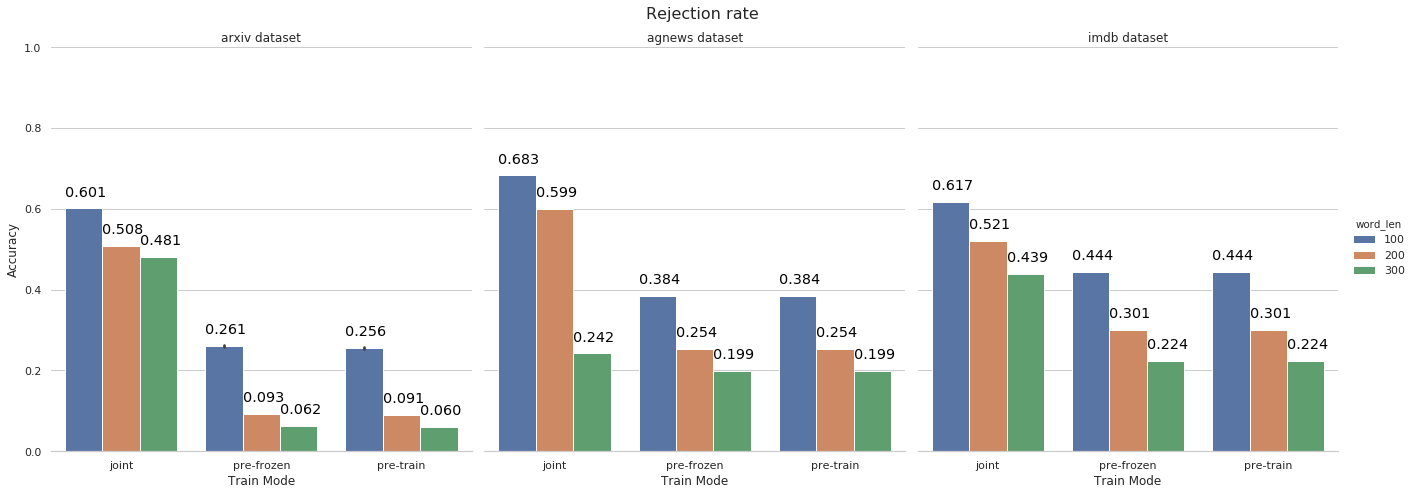

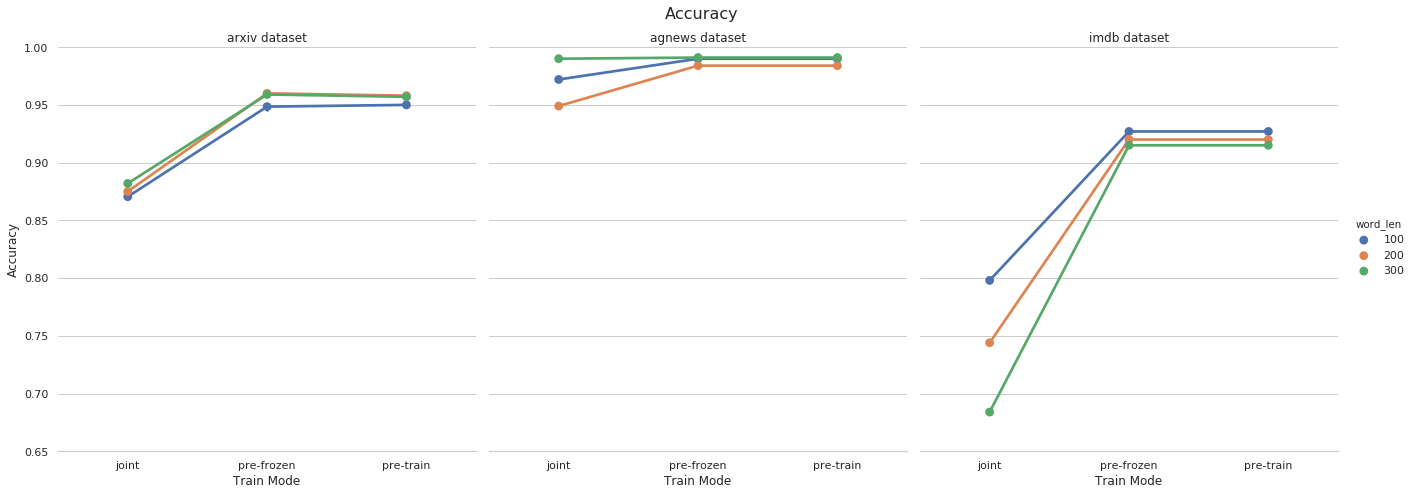

In [24]:

sns.set(style="whitegrid")
g = sns.catplot(x="train_mode", y="rejection_rate",
                 hue="word_len", col="dataset",
                 data=df, kind="bar",
                 height=7, aspect=.9)

(g.set_axis_labels("Train Mode", "Accuracy")
.set_xticklabels(["joint", "pre-frozen", "pre-train"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 1))
.despine(left=True)
.fig.suptitle('Rejection rate', fontsize=16)) 

plt.subplots_adjust(top=0.9)


for i in np.arange(3):
    ax1 = g.facet_axis(0,i)
    for p in ax1.patches:
        if str(p.get_height()) != 'nan':
            ax1.text(p.get_x(), 
                         p.get_height() + .03,
                         '{0:.3f}'.format(p.get_height()), 
                         color='black', 
                         rotation='horizontal', 
                         size='large')

g = sns.catplot(x="train_mode", y="accuracy",
                 hue="word_len", col="dataset",
                 data=df, kind="point",
                 height=7, aspect=.9)

(g.set_axis_labels("Train Mode", "Accuracy")
.set_xticklabels(["joint", "pre-frozen", "pre-train"])
.set_titles("{col_name} {col_var}", fontsize=30)
.set(ylim=(0.65, 1))
.despine(left=True)
.fig.suptitle('Accuracy', fontsize=16))  

plt.subplots_adjust(top=0.9)



## Continuous training

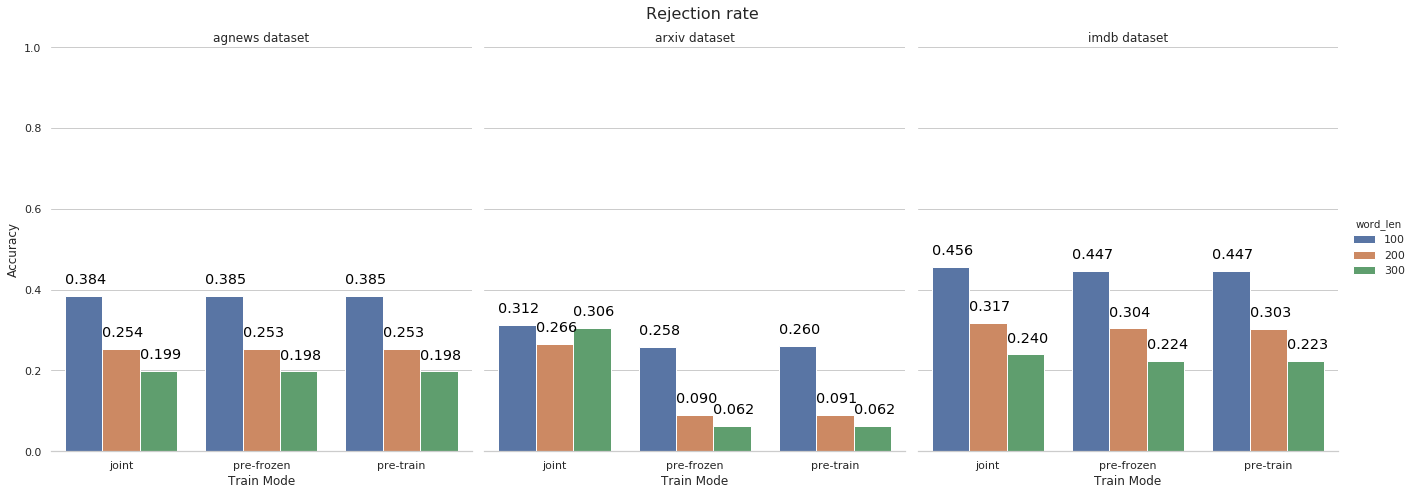

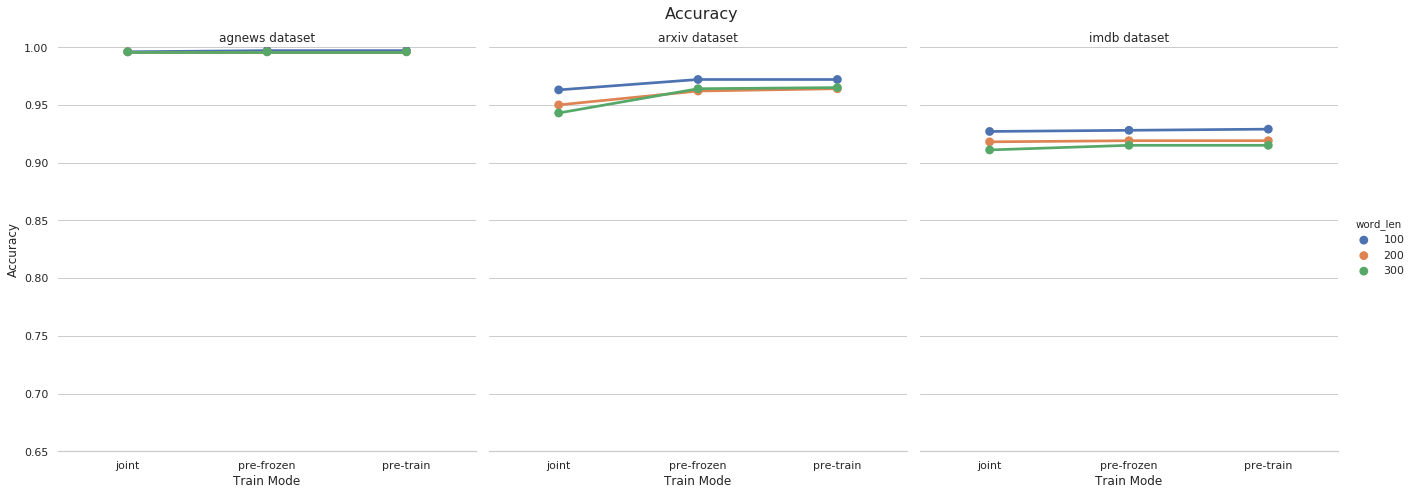

In [25]:

sns.set(style="whitegrid")
g = sns.catplot(x="train_mode", y="rejection_rate",
                 hue="word_len", col="dataset",
                 data=adf, kind="bar",
                 height=7, aspect=.9)

(g.set_axis_labels("Train Mode", "Accuracy")
.set_xticklabels(["joint", "pre-frozen", "pre-train"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 1))
.despine(left=True)
.fig.suptitle('Rejection rate', fontsize=16)) 

plt.subplots_adjust(top=0.9)


for i in np.arange(3):
    ax1 = g.facet_axis(0,i)
    for p in ax1.patches:
        if str(p.get_height()) != 'nan':
            ax1.text(p.get_x(), 
                         p.get_height() + .03,
                         '{0:.3f}'.format(p.get_height()), 
                         color='black', 
                         rotation='horizontal', 
                         size='large')

g = sns.catplot(x="train_mode", y="accuracy",
                 hue="word_len", col="dataset",
                 data=adf, kind="point",
                 height=7, aspect=.9)

(g.set_axis_labels("Train Mode", "Accuracy")
.set_xticklabels(["joint", "pre-frozen", "pre-train"])
.set_titles("{col_name} {col_var}", fontsize=30)
.set(ylim=(0.65, 1))
.despine(left=True)
.fig.suptitle('Accuracy', fontsize=16))  

plt.subplots_adjust(top=0.9)

